In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


## Data Loading


In [3]:
df = pd.read_csv('retail_sales_dataset.csv')


In [4]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


## Data cleaning

In [5]:
df.isnull().sum()    # checking null values in my data_set

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

**No null Values found in my data_set**

In [11]:
df.duplicated().sum() # Checking duplicate data

np.int64(0)

In [12]:
df.shape  # We have 1000 rows and 9 columns

(1000, 9)

In [13]:
df.info() # info about Dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [20]:
df['Date'] = pd.to_datetime(df['Date'])


In [21]:
df.describe() # Statistical summary of Dataset

,Transaction ID,Date,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2023-07-03 00:25:55.200000256,41.39200,2.514000,179.890000,456.000000
min,1.000000,2023-01-01 00:00:00,18.00000,1.000000,25.000000,25.000000
25%,250.750000,2023-04-08 00:00:00,29.00000,1.000000,30.000000,60.000000
50%,500.500000,2023-06-29 12:00:00,42.00000,3.000000,50.000000,135.000000
75%,750.250000,2023-10-04 00:00:00,53.00000,4.000000,300.000000,900.000000
max,1000.000000,2024-01-01 00:00:00,64.00000,4.000000,500.000000,2000.000000
std,288.819436,NaN,13.68143,1.132734,189.681356,559.997632


## Descriptive Statistics (mean, median, mode, standard deviation)

In [22]:
data = df.select_dtypes(include="number").iloc[:, 1:].agg(['mean', 'median', lambda x: x.mode()[0], 'std']).T
data.columns = ["Mean", "Median", "Mode", "Std"]


In [23]:
data

,Mean,Median,Mode,Std
Age,41.392,42.0,43.0,13.681430
Quantity,2.514,3.0,4.0,1.132734
Price per Unit,179.890,50.0,50.0,189.681356
Total Amount,456.000,135.0,50.0,559.997632


# Data Visulisation

### Time Series Analysis

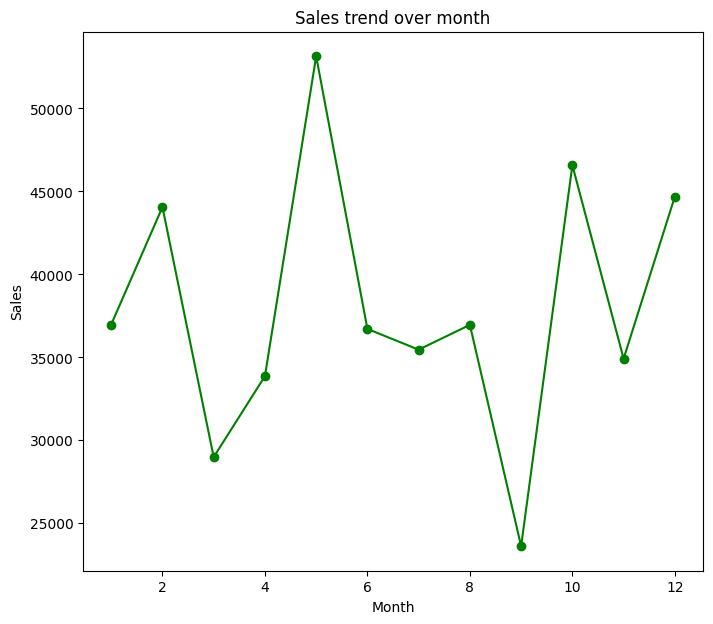

In [26]:
plt.figure(figsize=(8,7))
df.groupby(df['Date'].dt.month)['Total Amount'].sum().plot(kind='line', grid=True, color='g', marker='o')
plt.title("Sales trend over month")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.grid()
plt.show()


In [36]:
# df1 = df.copy()
# df1.set_index('Date', inplace=True)
# df.reset_index(inplace=True)

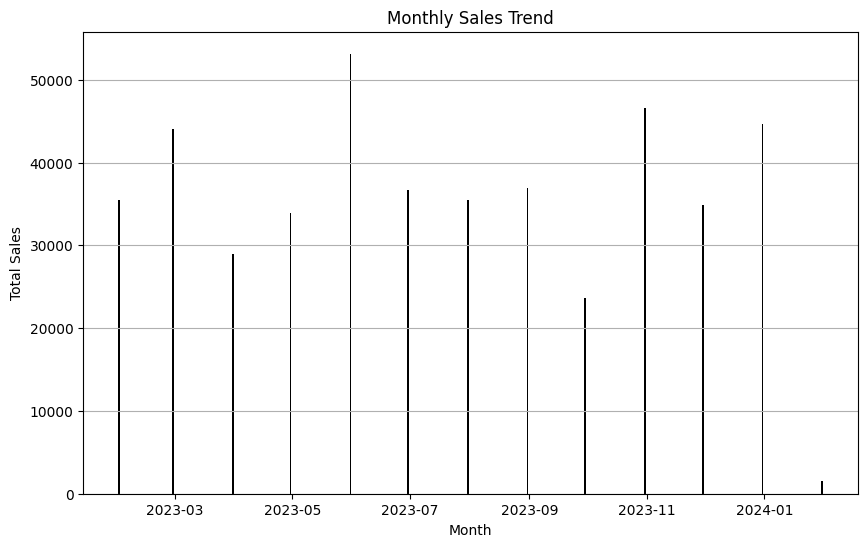

In [37]:
monthly_sales = df1.resample('M').sum()['Total Amount']
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales, color='black')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True, axis='y')
plt.show()

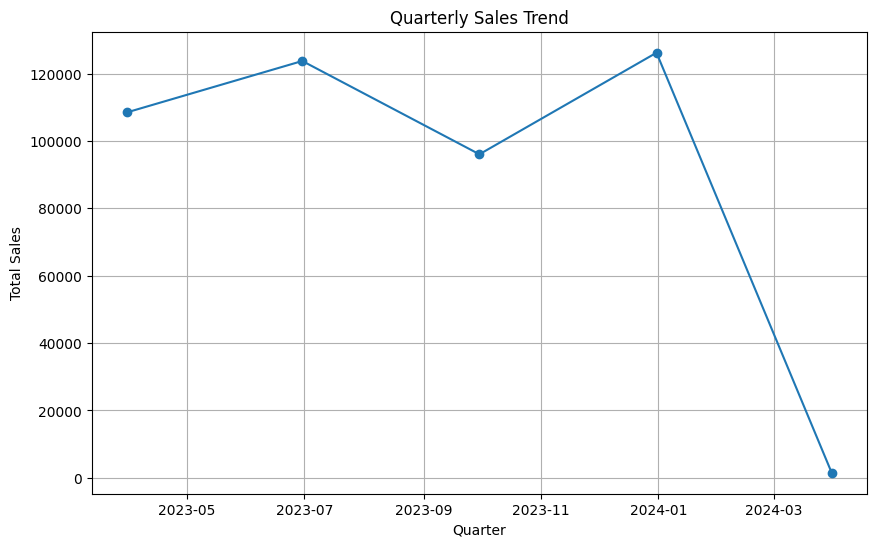

In [38]:
quarterly_sales = df1.resample('Q').sum()['Total Amount']

# Plot the quarterly sales trend
plt.figure(figsize=(10, 6))
plt.plot(quarterly_sales, marker='o')
plt.title('Quarterly Sales Trend')
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

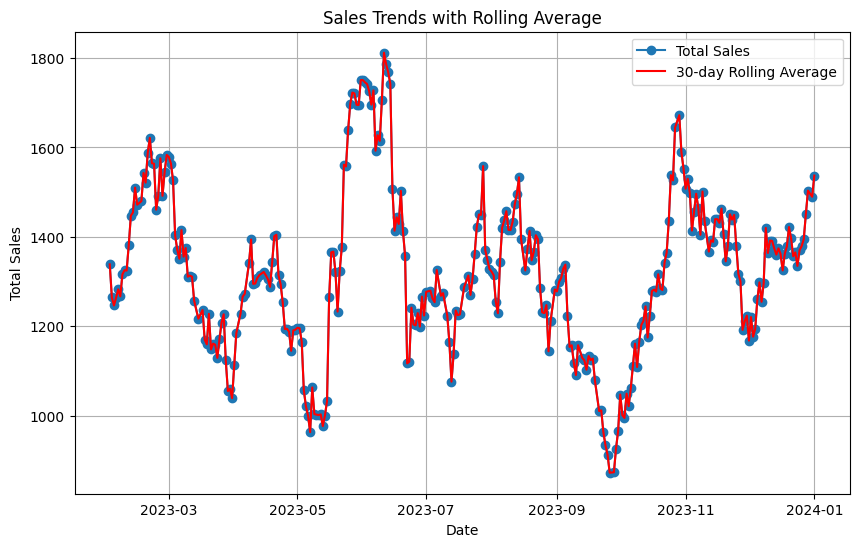

In [40]:
trend = df1.reset_index().groupby("Date").sum()['Total Amount']
trend.rolling(window=7).mean()
plt.figure(figsize=(10, 6))
plt.plot(trend.rolling(window=30).mean(), marker='o', linestyle='-', label='Total Sales')
plt.plot(trend.rolling(window=30).mean(), color='red', label='30-day Rolling Average')
plt.title('Sales Trends with Rolling Average')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

### Customer and Product Analysis: 

### Analyze customer demographics and purchasing behavior

Text(0, 0.5, 'Frequency')

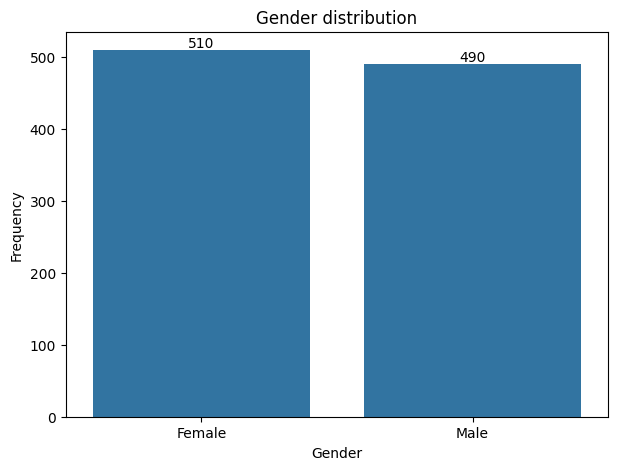

In [41]:
data = df['Gender'].value_counts().reset_index()
plt.figure(figsize=(7,5))
ax = sns.barplot(data=data, x="Gender", y='count')
ax.bar_label(ax.containers[0])
plt.title("Gender distribution")
plt.ylabel("Frequency")

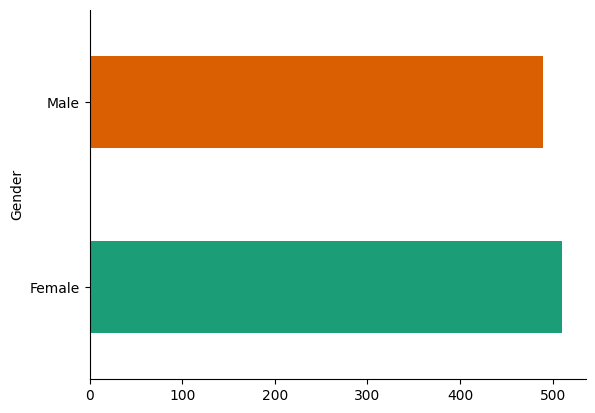

In [43]:
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

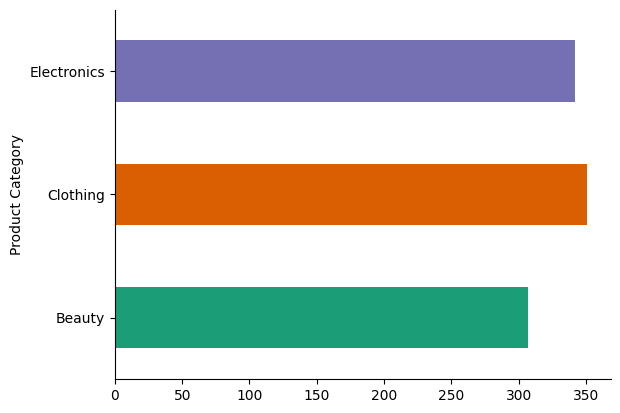

In [44]:
df.groupby('Product Category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:
product_sale = df.groupby("Product Category")['Total Amount'].sum().reset_index().sort_values(by="Total Amount", ascending=False)

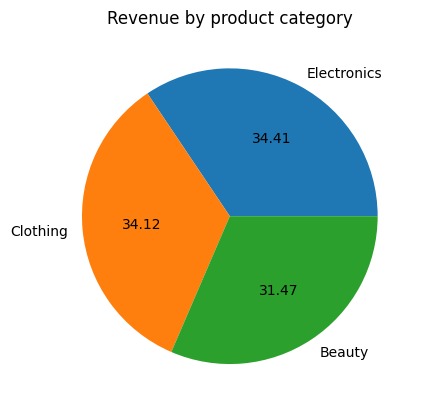

In [56]:
plt.pie(product_sale['Total Amount'], labels=product_sale['Product Category'], autopct="%.2f")
plt.title("Revenue by product category")
plt.show()

In [48]:
# df.drop(columns='index', inplace=True)
df.drop(columns='level_0', inplace=True)

In [49]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


### Age_group

In [50]:
def age_group(value):
    if value <= 25: 
        return "Youth"
    elif value >25  and value <40: 
        return "Adult"
    else:
        return "Seniors"
df['Age_group'] = df['Age'].apply(age_group)

In [52]:
df['Age'].max()

np.int64(64)

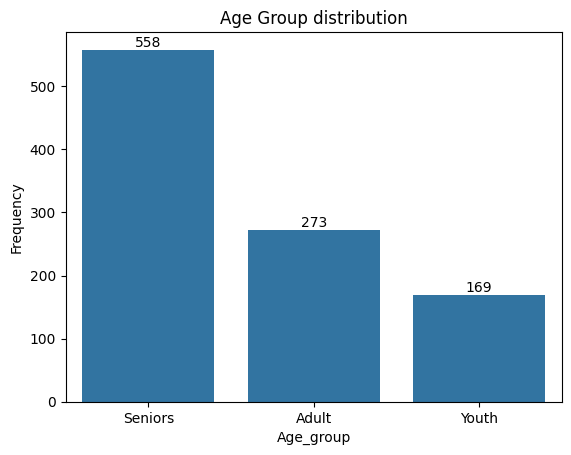

In [53]:
age_dist = df['Age_group'].value_counts().reset_index()
ax= sns.barplot(data=age_dist, x='Age_group', y='count')
ax.bar_label(ax.containers[0])
plt.title("Age Group distribution")
plt.ylabel("Frequency")
plt.show()

In [57]:
df.groupby("Customer ID")['Total Amount'].mean().reset_index().sort_values(by='Total Amount', ascending=False).head(10)

,Customer ID,Total Amount
487,CUST487,2000.0
476,CUST476,2000.0
773,CUST773,2000.0
503,CUST503,2000.0
92,CUST093,2000.0
88,CUST089,2000.0
946,CUST946,2000.0
157,CUST157,2000.0
155,CUST155,2000.0
420,CUST420,2000.0


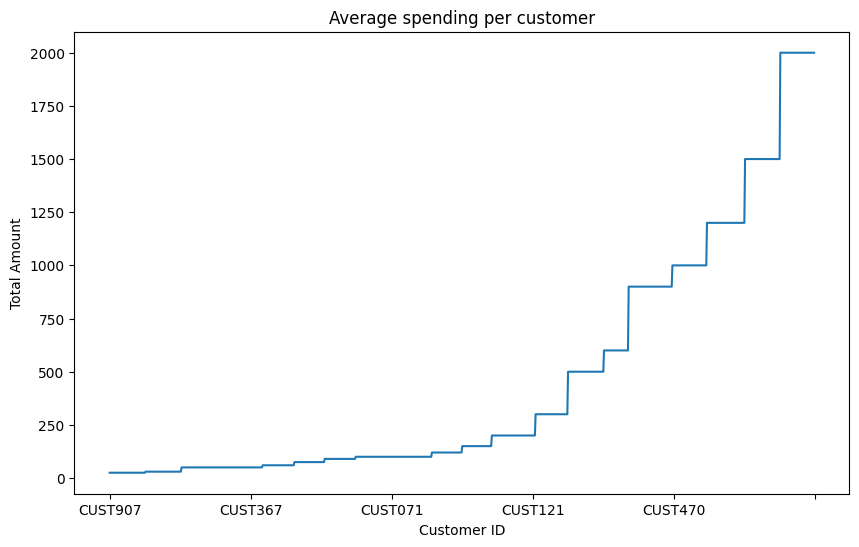

In [58]:
plt.figure(figsize=(10,6))
df.groupby("Customer ID")['Total Amount'].mean().sort_values(ascending=True).plot(kind='line')
plt.title("Average spending per customer")
plt.ylabel("Total Amount")
plt.show()

### Present insights through bar charts, line plots, and heatmaps.

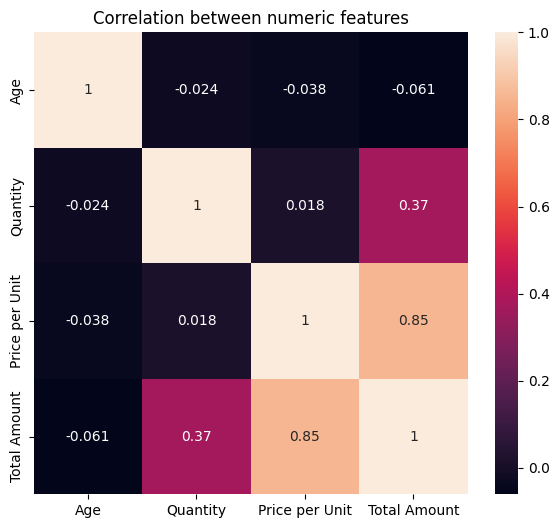

In [59]:
plt.figure(figsize=(7,6))
numeric_col = df.select_dtypes(include="number").iloc[:,1:]
sns.heatmap(numeric_col.corr(), annot=True)
plt.title("Correlation between numeric features")
plt.show()

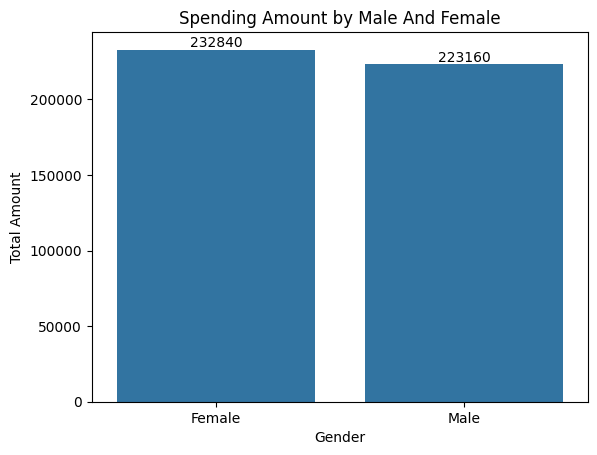

In [60]:
gender_sales = df.groupby("Gender")['Total Amount'].sum().reset_index()
ax= sns.barplot(data=gender_sales, x="Gender", y="Total Amount")
ax.bar_label(ax.containers[0])
plt.title("Spending Amount by Male And Female")
plt.show()

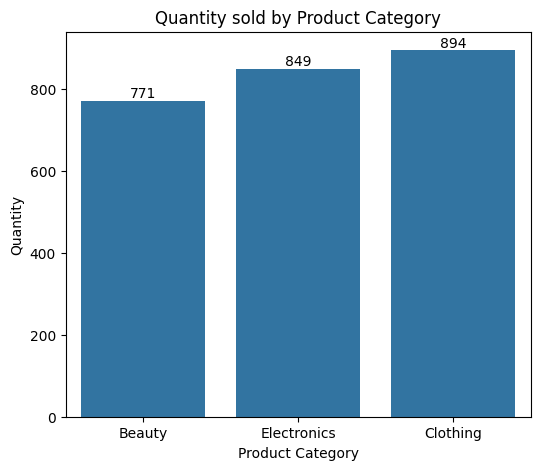

In [61]:
plt.figure(figsize=(6,5))
total_quatity = df.groupby("Product Category")["Quantity"].sum().reset_index().sort_values(by='Quantity')
ax = sns.barplot(data=total_quatity, x='Product Category', y='Quantity')
ax.bar_label(ax.containers[0])
plt.title("Quantity sold by Product Category")
plt.show()

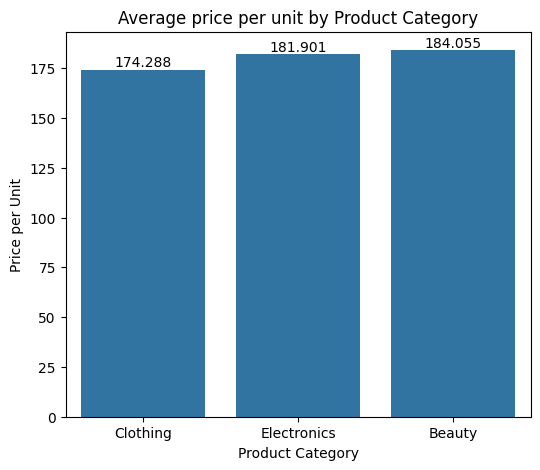

In [62]:
plt.figure(figsize=(6,5))
total_quatity = df.groupby("Product Category")["Price per Unit"].mean().reset_index().sort_values(by='Price per Unit')
ax = sns.barplot(data=total_quatity, x='Product Category', y='Price per Unit')
ax.bar_label(ax.containers[0])
plt.title("Average price per unit by Product Category")
plt.show()

## Recommendations: Provide actionable recommendations based on the EDA
**In coming year we need to focus on some aspects to improve the revenue
Age group**
**we need to target more on the Senior age group because as we see we getting more revenue from senior age group by giving some festival
discount to boost the revenue beacuse 51.87 percent revenue received from seniors only.
and also need to focused on adult age group around 29.59 revenue received from adult age group
we can launch seasonal trending discount**

In [63]:
senior_spend = df.groupby("Age_group")["Total Amount"].sum().sort_values(ascending=False)[0]
Total_sales = df.groupby("Age_group")["Total Amount"].sum().reset_index().sum()[1]
print("Oerall Senior spending amount :", round(senior_spend/Total_sales*100,2))

Oerall Senior spending amount : 51.87


In [64]:
print("Overall Adult Spending amount :", round((df.groupby("Age_group")["Total Amount"].sum().sort_values(ascending=False)[1]/df.groupby("Age_group")["Total Amount"].sum().reset_index().sum()[1])*100,2))

Overall Adult Spending amount : 29.59


## Gender recomendation
**We have almost equally male and female customer and revenue recieved by both are almost same
so to boost revenue from male and female as per my analysis we need add attractive interface of our shopping
page and we may need to highly recommend beauty and clothing product to the female customer with some coupoun code and discount so that she can buy more product and for male we need to recommend the Electronics product as well**